Contoh data mentah:
   conversation_id_str                      created_at  favorite_count  \
0         1.934963e+18  Tue Jun 17 13:13:45 +0000 2025               1   
1         1.934956e+18  Tue Jun 17 12:46:31 +0000 2025               0   
2         1.934947e+18  Tue Jun 17 12:10:21 +0000 2025               0   
3         1.934816e+18  Tue Jun 17 10:50:57 +0000 2025               0   
4         1.934918e+18  Tue Jun 17 10:16:52 +0000 2025               0   

                                           full_text        id_str image_url  \
0   Pembayaran Harian yang Praktis Ada PEXX Card ...  1.934963e+18       NaN   
1  Aplikasi online yg ada fitur mobil pick up nya...  1.934956e+18       NaN   
2  Aku lagi survey data tentang seberapa sering k...  1.934947e+18       NaN   
3  @e100ss Bukan ide baru. Bahkan lahirnya gojek ...  1.934927e+18       NaN   
4  Pesan Taksi Listrik Green SM Kini Bisa via Apl...  1.934918e+18       NaN   

  in_reply_to_screen_name lang  location  quote_count 

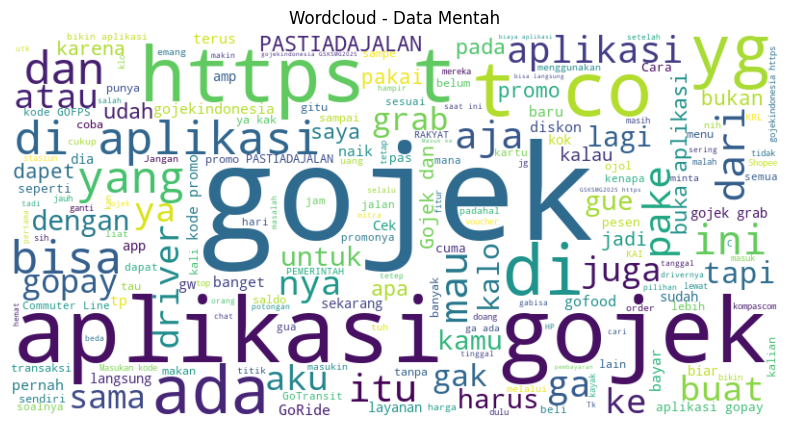

C:\Users\Dell\AppData\Local\Temp\ipykernel_17028\3676882411.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


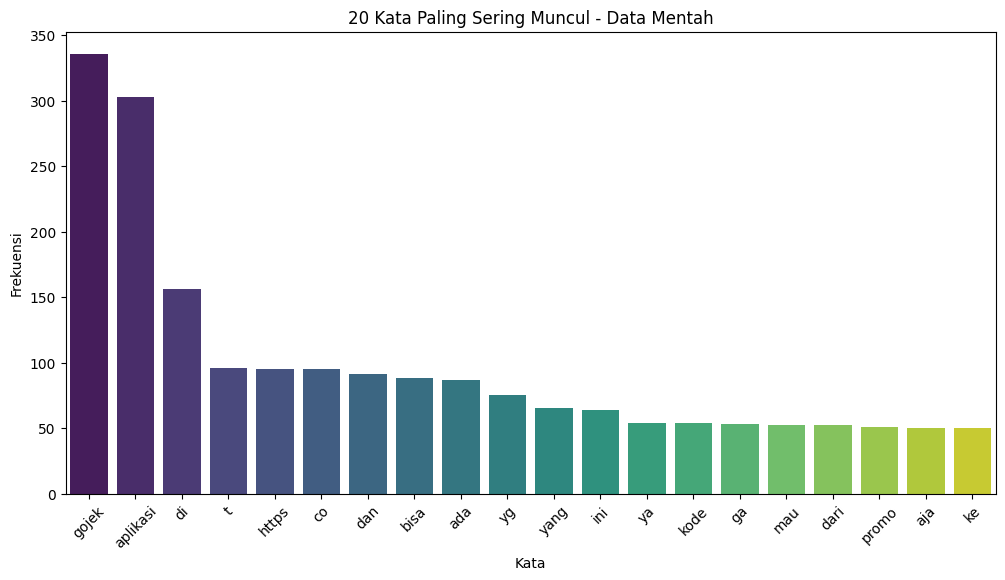

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# Load data mentah
df_raw = pd.read_csv("../data/raw/GojekReview.csv")

# Preview data
print("Contoh data mentah:")
print(df_raw.head())

# Gabungkan semua teks
all_text = " ".join(df_raw["full_text"].astype(str))

# Tokenisasi + bersihkan
all_words = re.findall(r'\b\w+\b', all_text.lower())
common_words = Counter(all_words).most_common(20)

# Visualisasi WordCloud
wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud - Data Mentah")
plt.show()

# Visualisasi 20 Kata Paling Sering
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('20 Kata Paling Sering Muncul - Data Mentah')
plt.xticks(rotation=45)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()


=== Statistik Deskriptif ===
Jumlah data: 282
Jumlah kolom: 15
Kolom tersedia: ['conversation_id_str', 'created_at', 'favorite_count', 'full_text', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username']

Panjang teks (karakter):
count    282.000000
mean     194.592199
std       80.004628
min       25.000000
25%      128.000000
50%      210.000000
75%      265.000000
max      396.000000
Name: text_length_char, dtype: float64

Panjang teks (kata):
count    282.000000
mean      28.936170
std       12.120517
min        4.000000
25%       20.000000
50%       29.500000
75%       39.000000
max       55.000000
Name: text_length_words, dtype: float64


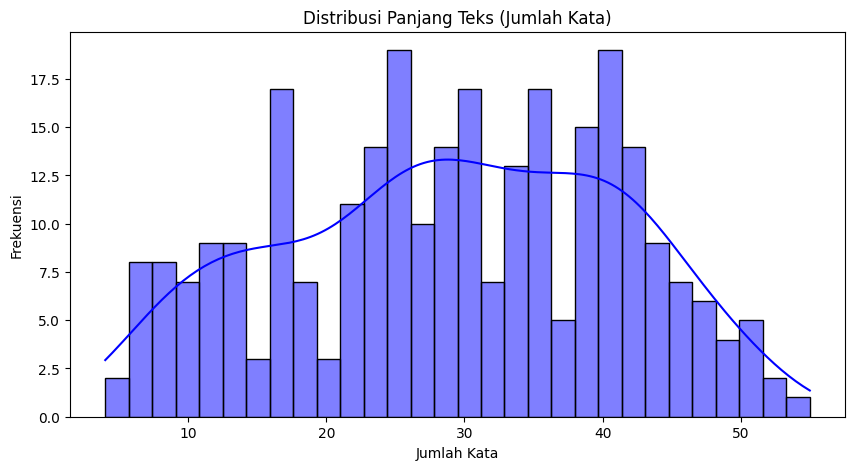


Distribusi Bahasa:
lang
in    282
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_17028\894660619.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lang', data=df_raw, palette='coolwarm')


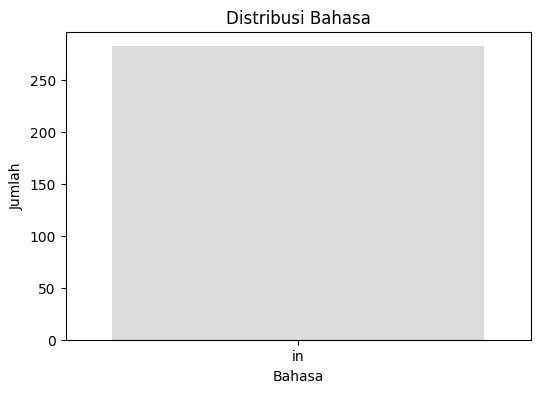

In [4]:
# Statistik Deskriptif
print("=== Statistik Deskriptif ===")
print(f"Jumlah data: {len(df_raw)}")
print(f"Jumlah kolom: {len(df_raw.columns)}")
print(f"Kolom tersedia: {list(df_raw.columns)}")

# Panjang teks (jumlah karakter & kata)
df_raw['text_length_char'] = df_raw['full_text'].astype(str).apply(len)
df_raw['text_length_words'] = df_raw['full_text'].astype(str).apply(lambda x: len(x.split()))

print("\nPanjang teks (karakter):")
print(df_raw['text_length_char'].describe())

print("\nPanjang teks (kata):")
print(df_raw['text_length_words'].describe())

# Distribusi Panjang Teks (Visualisasi)
plt.figure(figsize=(10,5))
sns.histplot(df_raw['text_length_words'], bins=30, kde=True, color='blue')
plt.title('Distribusi Panjang Teks (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

# Cek distribusi bahasa jika kolom 'lang' tersedia
if 'lang' in df_raw.columns:
    print("\nDistribusi Bahasa:")
    print(df_raw['lang'].value_counts())
    plt.figure(figsize=(6,4))
    sns.countplot(x='lang', data=df_raw, palette='coolwarm')
    plt.title('Distribusi Bahasa')
    plt.xlabel('Bahasa')
    plt.ylabel('Jumlah')
    plt.show()


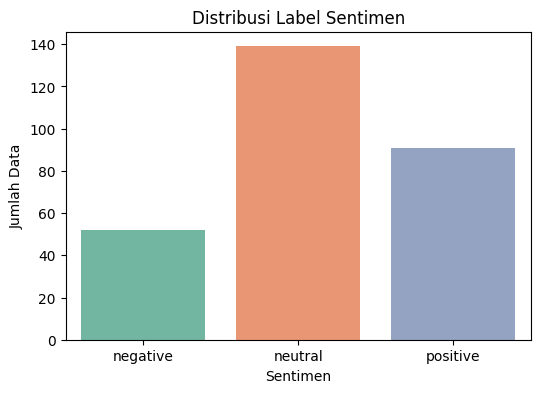

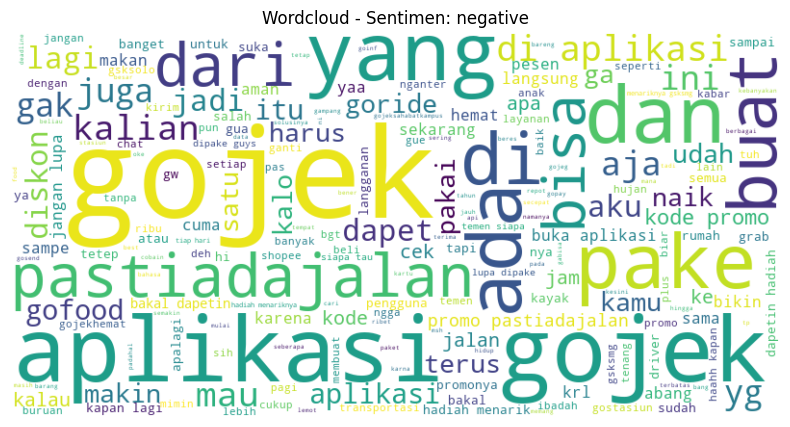

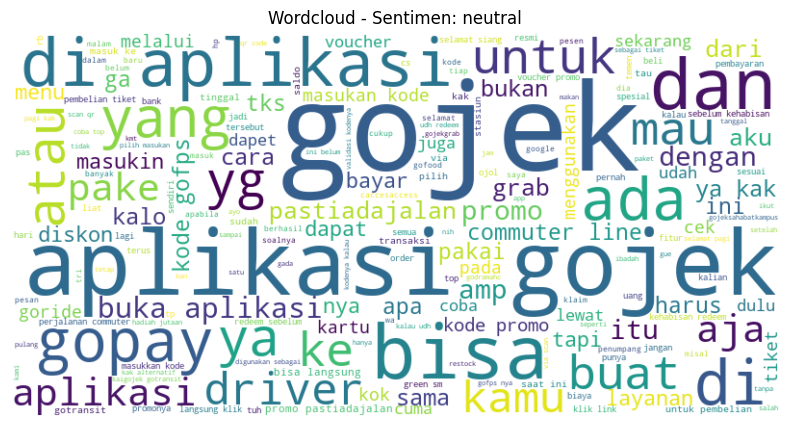

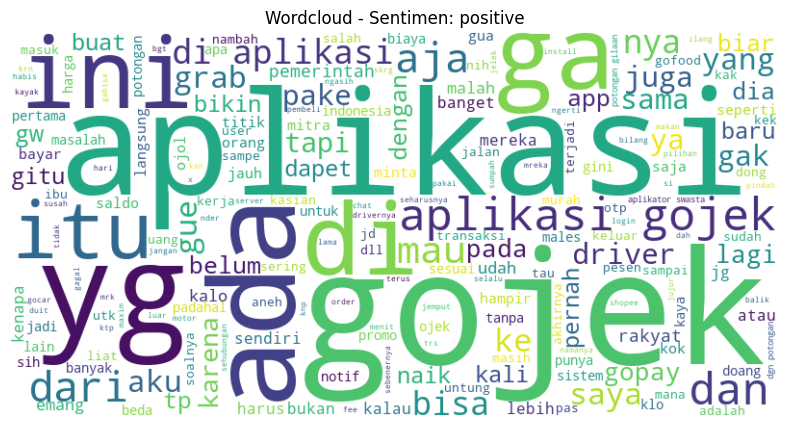

In [4]:
# Load data yang sudah dilabeli
df_labeled = pd.read_csv("../data/processed/gojek_cleaned_labeled.csv")

# Distribusi Sentimen
plt.figure(figsize=(6,4))
sns.countplot(data=df_labeled, x='sentiment', palette='Set2')
plt.title("Distribusi Label Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Data")
plt.show()

# WordCloud per sentimen
for label in df_labeled['sentiment'].unique():
    subset = df_labeled[df_labeled['sentiment'] == label]
    text = " ".join(subset['clean_text'].astype(str))
    
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud - Sentimen: {label}")
    plt.show()
